<a href="https://colab.research.google.com/github/Emanoeljunior/UDESC/blob/master/Exercicio_Lineariza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importando bibliotecas

In [ ]:
# Bibliotecas para uso de imagens
from IPython.display import Image
# Outras bibliotecas 
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import *


#Sistema de Nível de Líquido

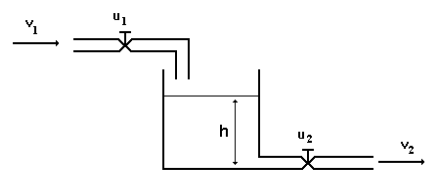

In [ ]:
Image("/content/drive/My Drive/Udesc/2020 1/ISC/LAB/imagens/tanque.png",width=600)

${A \dfrac{dh(t)}{dt} = k_{1}u_{1}-k_{2}u_{2} \sqrt{h(t)}}$

${A = 2m^{2}}$  ${\space k_{1} =1,5}$   ${ \space k_{2} = 0,8 }$  ${ \space u_{2} = 1 }$



##Linearização

${u_{10} =0,75 \space \rightarrow k_{1}u_{1} = k_2 u_2 \sqrt{H_0} \rightarrow H_0 = (\frac{k_1 u_{10}}{k_2 u_2})^{2}}$

${f(h)\approx f(H_0)+ m\delta h}$

${m_a=\dfrac{d\delta h}{dt} = \dfrac{1}{2 \sqrt{H_0}} = \dfrac{k_2 u_2}{2k_1 u_{10}}}$

${f(h) \approx \dfrac{k_1 u_{10}}{k_2 u_2} + \dfrac{k_2 u_2}{2 k_1 u_{10}} \delta h}$

${A \dfrac{d \delta h}{dt} = k_1(u_{10} + \delta u) - k_2 u_2 ( \frac{k_1 u_{10}
}{k_2 u_2} +\frac{k_2 u_2}{2 k_1 u_{10} }\delta h)}$

${ A\dfrac{d \delta h}{dt} = k_1\delta u - \frac{(k_2 u_2)^2}{2 k_1 u_{10} }\delta h}$

${ \dfrac{d \delta h}{dt} = \frac{k_1}{A}\delta u - \frac{(k_2 u_2)^2}{2 A k_1 u_{10} }\delta h}$

${K = \dfrac{(k_2 u_2)^2}{2Ak_1 u_{10}}}$

##Representação em diagrama de blocos

###Sistema não linear

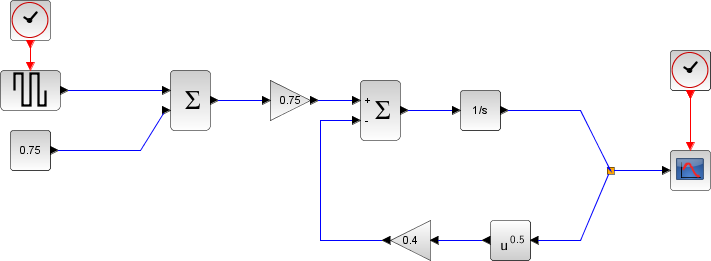

In [ ]:
Image("/content/drive/My Drive/Udesc/2020 1/ISC/LAB/imagens/bloco_n_linear.png",width=600)

###Sistema Linearizado

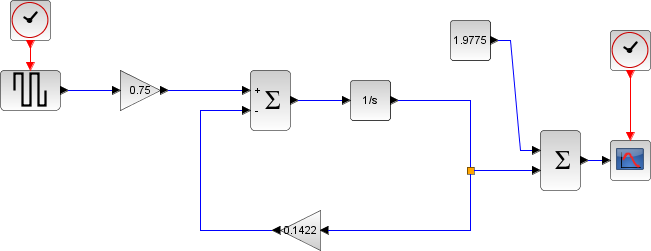

In [ ]:
Image("/content/drive/My Drive/Udesc/2020 1/ISC/LAB/imagens/bloco_linear.png",width=600)

###Comparação entre o linear e o não linear

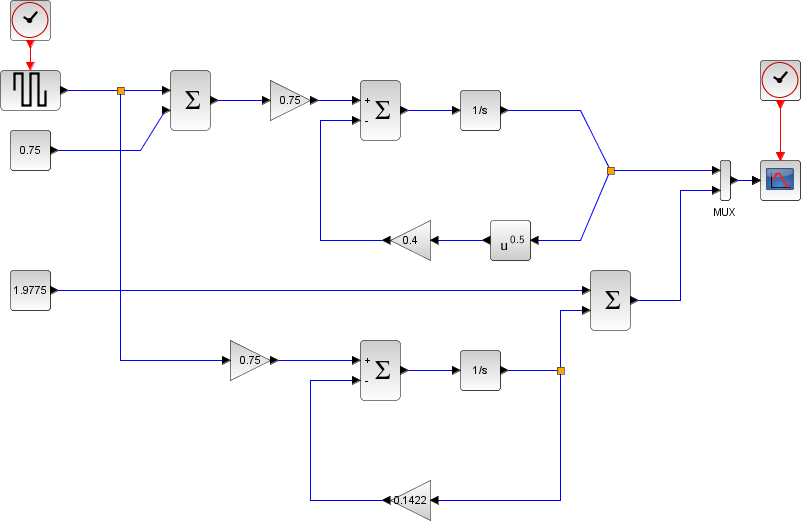

In [ ]:
Image("/content/drive/My Drive/Udesc/2020 1/ISC/LAB/imagens/bloco_completo.png",width=600)

#### Gráfico de comparação

Curva verde = modelo linearizado

Curva preta = modelo não linear

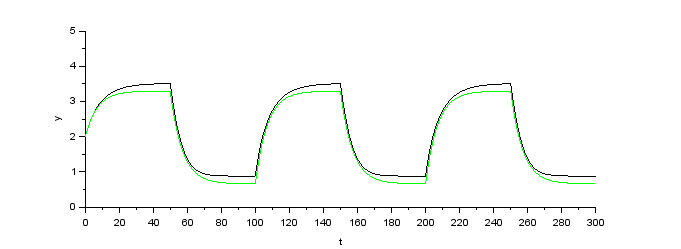

In [ ]:
Image("/content/drive/My Drive/Udesc/2020 1/ISC/LAB/imagens/grafico_bloco_completo.png",width=600)

## Modelo em python

###Definição das constantes

In [ ]:
A = 2
k1 = 1.5
k2 = 0.8
u10 = 0.75
u2 = 1
h0 = 1.9775

### Definição dos modelos

####Modelo Linear

${ \dfrac{d \delta h}{dt} = \frac{k_1}{A}\delta u - \frac{(k_2 u_2)^2}{2 A k_1 u_{10} }\delta h}$

####Modelo não Linear
${ \dfrac{dh(t)}{dt} = \dfrac{k_{1}u_{1}}{A} -\dfrac{k_{2}u_{2}\sqrt{h(t)}}{A}}$

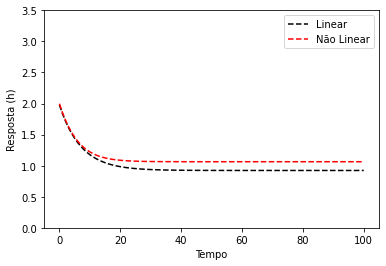

In [ ]:
global du
# modelo linear
def modelLinear(y1,t1):
  return ((k1/A)*du - (((k2*u2)**2)/(2*A*k1*u10))*y1)

# modelo não linear 
def modelNLinear(y1,t1):
  return ((k1*(u10+du)/A) - ((k2*u2)*(y1**(0.5))/A))

#@title Number fields
du = -0.2 #@param {type:"slider", min:-0.25, max:0.25, step:0.05}
t1 = np.linspace(0,100,100)
y1_1 = odeint(modelLinear,0,t1) + h0
y1_2 = odeint(modelNLinear,1.9975,t1)

# Plotando gráfico
plt.figure(1)
plt.plot(t1,y1_1,"k--", label='Linear')
plt.plot(t1,y1_2,"r--", label='Não Linear')

plt. legend(loc = 'best')
plt.xlabel('Tempo')
plt.ylabel('Resposta (h)')
plt.yticks(np.arange(0,4, 0.5))
plt.show()



### Cálculo do erro

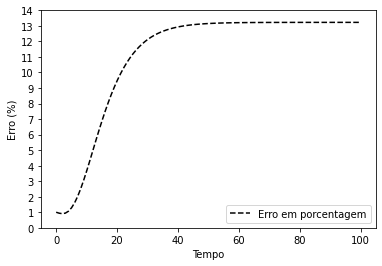

In [ ]:
erro = abs(100*(y1_1-y1_2)/y1_2)

# Plotando gráfico
plt.figure(1)
plt.plot(t1, erro,"k--", label='Erro em porcentagem')

plt. legend(loc = 'best')
plt.xlabel('Tempo')
plt.ylabel('Erro (%)')
plt.yticks(np.arange(0,max(erro)+1, 1))
plt.show()